In [206]:
# We use sqlite 3 as a resource to help us work with sqlite in python
import sqlite3
# we install the datetime
from datetime import datetime, timedelta
#we need pandas to data clean and wrangle our data 
import pandas as pd
#I needed numpy to replace nan values 
import numpy as np
# we need plotly to visualise our data 
import matplotlib.pyplot as plt

#with the .connect method we can communicate 'connect with our sqlite database'
sqliteConnection = sqlite3.connect("BUSINESS.db")

#we have to create a varibale 'query' which will hold our sql statements
sqlite_select_Query = "SELECT * FROM BUZZ;"


In [207]:
#we use the .read_sql_query and conn 'connection' to view our data in dataform format
df=pd.read_sql_query(sqlite_select_Query,sqliteConnection)
df.head(20641)

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SEA1AA,2011.06,80078.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
1,BDCQ.SEA1AA,2011.09,78324.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
2,BDCQ.SEA1AA,2011.12,85850.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
3,BDCQ.SEA1AA,2012.03,90743.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
4,BDCQ.SEA1AA,2012.06,81780.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20636,BDCQ.SEE3999A,2017.06,NaN,Y,C,Number,0,Business Data Collection - BDC,Territorial authority by employment variable,Filled jobs (workplace location based),Area Outside Territorial Authority,Actual,None,None
20637,BDCQ.SEE3999A,2017.09,NaN,Y,C,Number,0,Business Data Collection - BDC,Territorial authority by employment variable,Filled jobs (workplace location based),Area Outside Territorial Authority,Actual,None,None
20638,BDCQ.SEE3999A,2017.12,NaN,Y,C,Number,0,Business Data Collection - BDC,Territorial authority by employment variable,Filled jobs (workplace location based),Area Outside Territorial Authority,Actual,None,None
20639,BDCQ.SEE3999A,2018.03,NaN,Y,C,Number,0,Business Data Collection - BDC,Territorial authority by employment variable,Filled jobs (workplace location based),Area Outside Territorial Authority,Actual,None,None


In [208]:
#we analyse the columns
df.columns

Index(['Series_reference', 'Period', 'Data_value', 'Suppressed', 'STATUS',
       'UNITS', 'Magnitude', 'Subject', 'Group', 'Series_title_1',
       'Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='object')

In [209]:
# To know the rows and skip steps inbetween each 
df.index

RangeIndex(start=0, stop=20641, step=1)

In [210]:
# to identify the number of  the cols and rows in our dataframe
df.shape

(20641, 14)

In [211]:
# we continue with our analysis of all the data to identify more using the .info method
#Its clear period and datavale are the only numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  20641 non-null  object 
 1   Period            20641 non-null  float64
 2   Data_value        16146 non-null  float64
 3   Suppressed        2839 non-null   object 
 4   STATUS            20641 non-null  object 
 5   UNITS             20641 non-null  object 
 6   Magnitude         20641 non-null  int64  
 7   Subject           20641 non-null  object 
 8   Group             20641 non-null  object 
 9   Series_title_1    20641 non-null  object 
 10  Series_title_2    20641 non-null  object 
 11  Series_title_3    20641 non-null  object 
 12  Series_title_4    0 non-null      object 
 13  Series_title_5    0 non-null      object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.2+ MB


In [222]:
# we analyse the top and bottom of our df to see what columns have no values using the .tail and .head
df.isnull().tail()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
20636,False,False,True,False,False,False,False,False,False,False,False,False,True,True
20637,False,False,True,False,False,False,False,False,False,False,False,False,True,True
20638,False,False,True,False,False,False,False,False,False,False,False,False,True,True
20639,False,False,True,False,False,False,False,False,False,False,False,False,True,True
20640,False,False,True,False,False,False,False,False,False,False,False,False,True,True


In [221]:
df.head(2)

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SEA1AA,2011.06,80078.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
1,BDCQ.SEA1AA,2011.09,78324.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None


In [178]:

# I decided to use the mean inorder to be used as a replacement for missing data 
df["Data_value"].mean
#Below we replce the empty rows with the mean its important to remember the role of numpy
#We should never forget to keep the settings inplace as True to apply to the df
df["Data_value"].replace(np.nan,80078.0,inplace=True)
#We select the data value in relation to the series'industry'




In [228]:
# we group our dataframe with period
qz=df.groupby(df["Period"])

<AxesSubplot:title={'center':'DATA VALUE EXPRESSED OVER THE YEARS'}, ylabel='Period'>

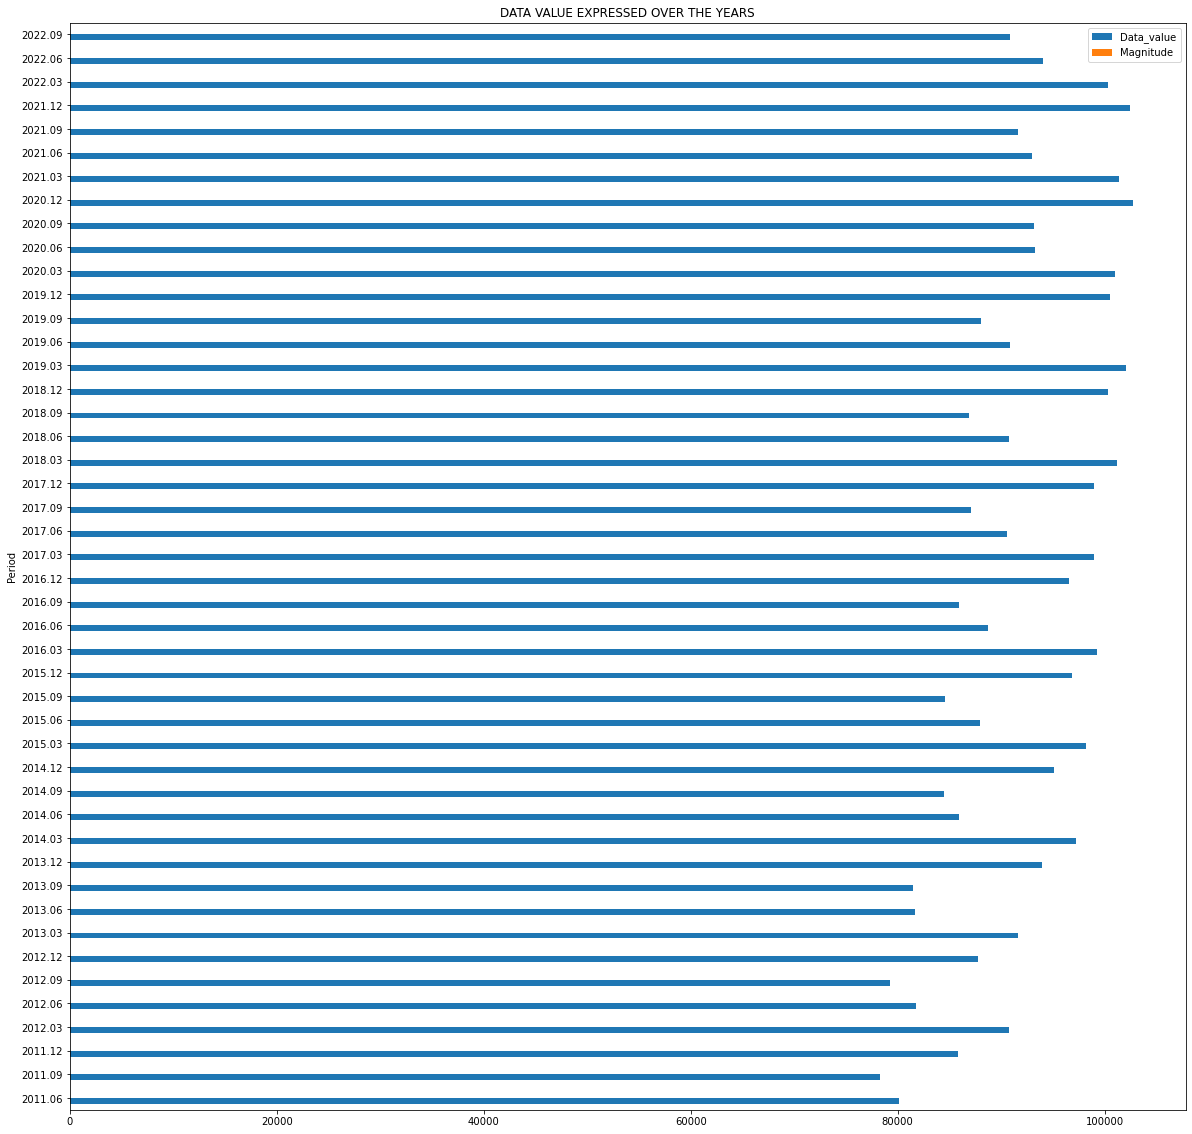

In [229]:
# using plorly we visualise our data 
qz.first().plot(kind="barh",figsize=(20,20),title="DATA VALUE EXPRESSED OVER THE YEARS")